In [1]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore",category = FutureWarning)
warnings.filterwarnings("ignore",category =  RuntimeWarning)

In [2]:
# Load the training data
df = pd.read_csv('LifeExpectancy_training.csv')

In [3]:
df.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,71.4


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Adult_Mortality'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'percentage_expenditure'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Total_expenditure'}>,
        <AxesSubplot:title={'center':'Diphtheria'}>,
        <AxesSubplot:title={'center':'HIV_AIDS'}>],
       [<AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Income_composition_of_resources'}>,
        <AxesSubplot:title={'center':'Schooling'}>],
       [<AxesSubplot:title={'center':'Life_expectancy'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

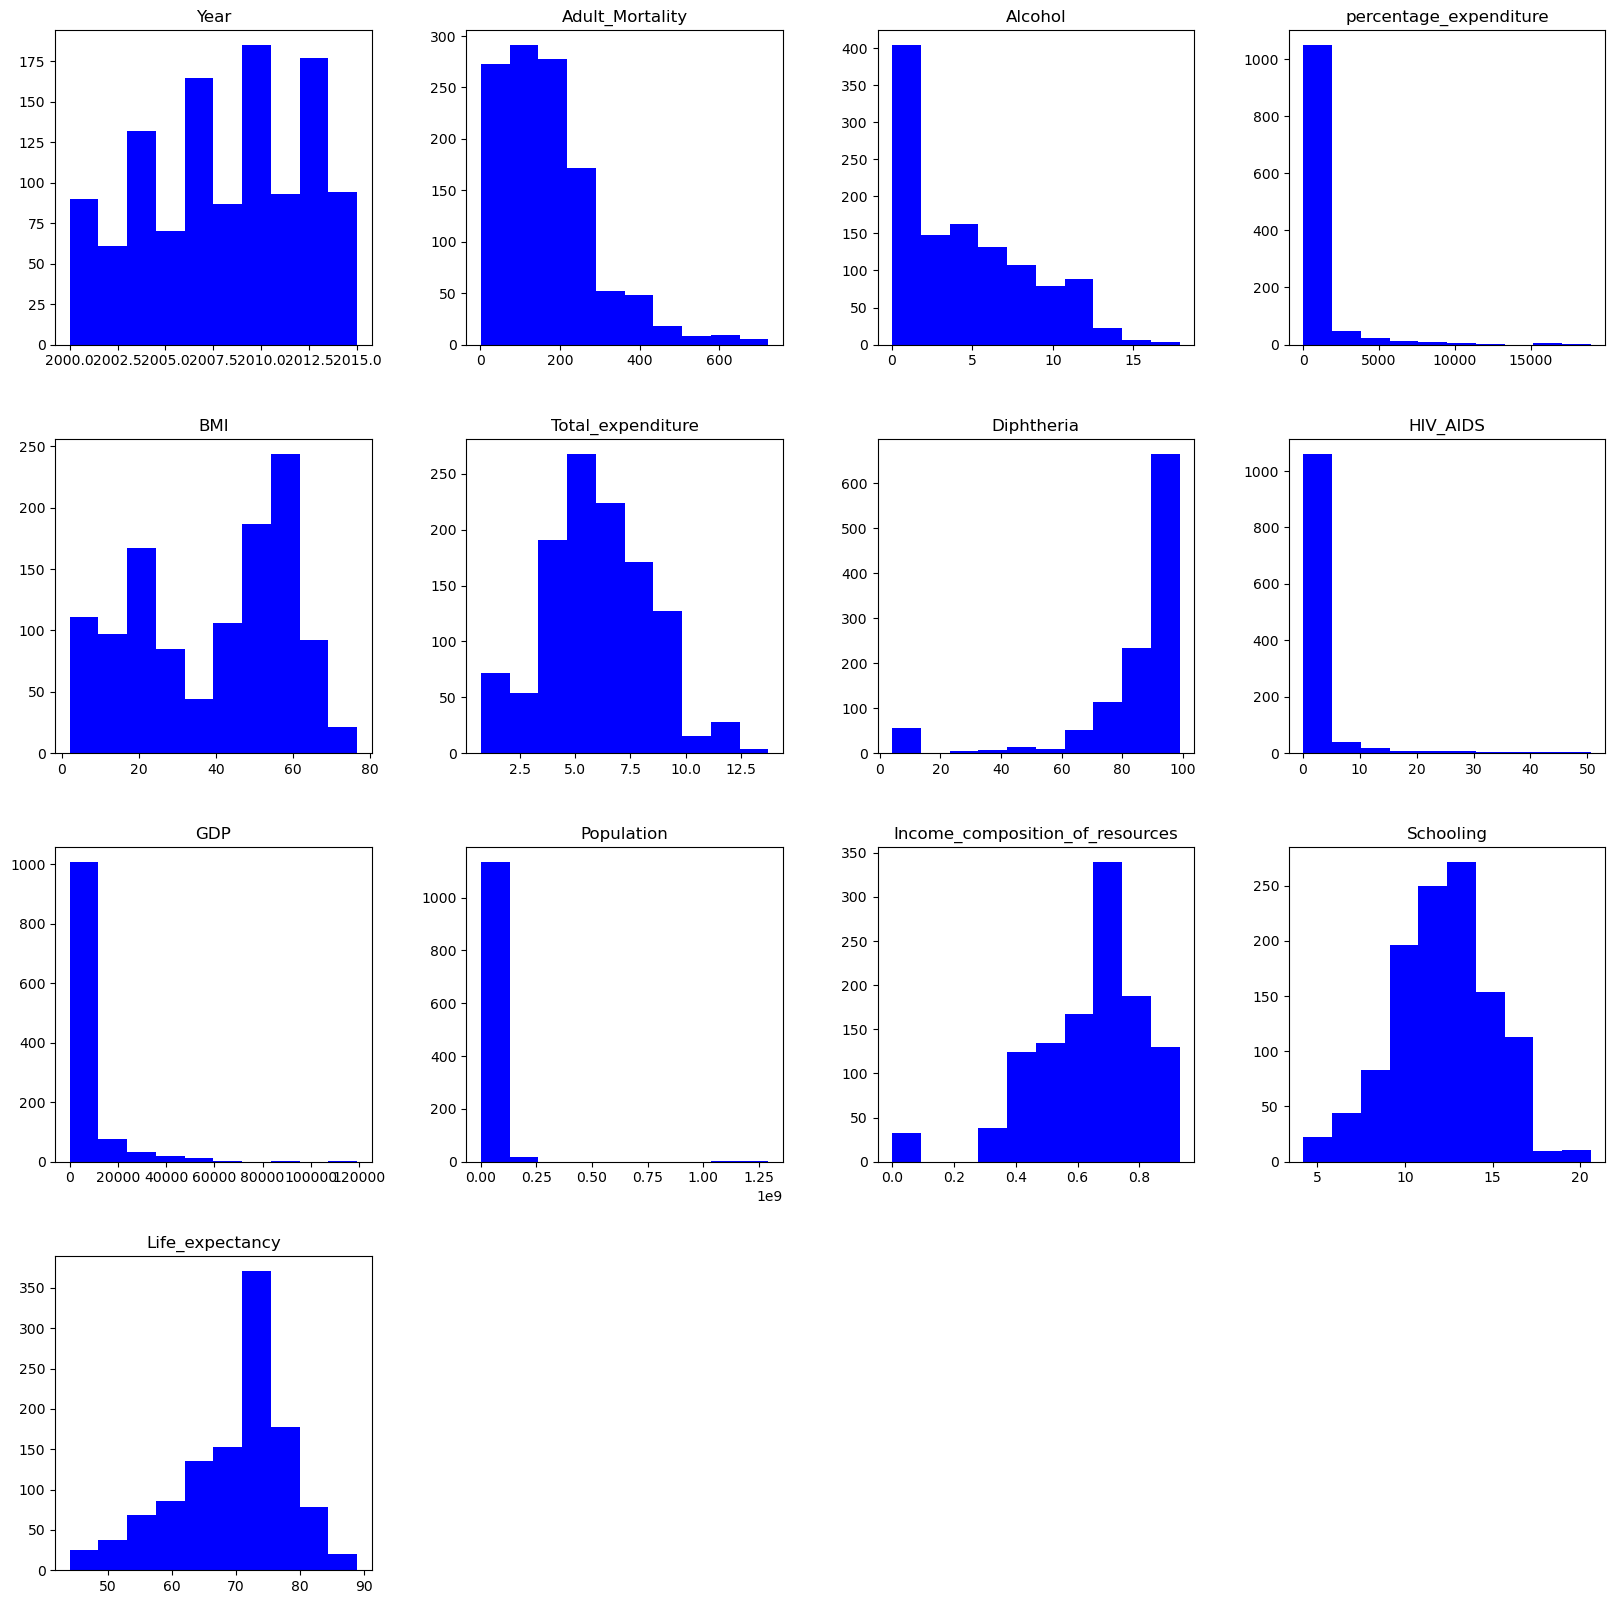

In [4]:
df.hist(grid=False, figsize=(20,20), color='blue')

1. There seems almost to be a normal distribution for parameters of `total_expenditure`, `income_composition_of_resources`, `schooling` and `life_expectancy`
2. Features of `Percentage_expenditure`, `GDP`, `Population` and `HIV_AIDS` are heavily skewed to the right and `Diptheria` is heavily left skewed.
3. `Adult_mortality` and `Alcohol` are moderately right-skewed and `BMI` is bi-modal around 20 and 60


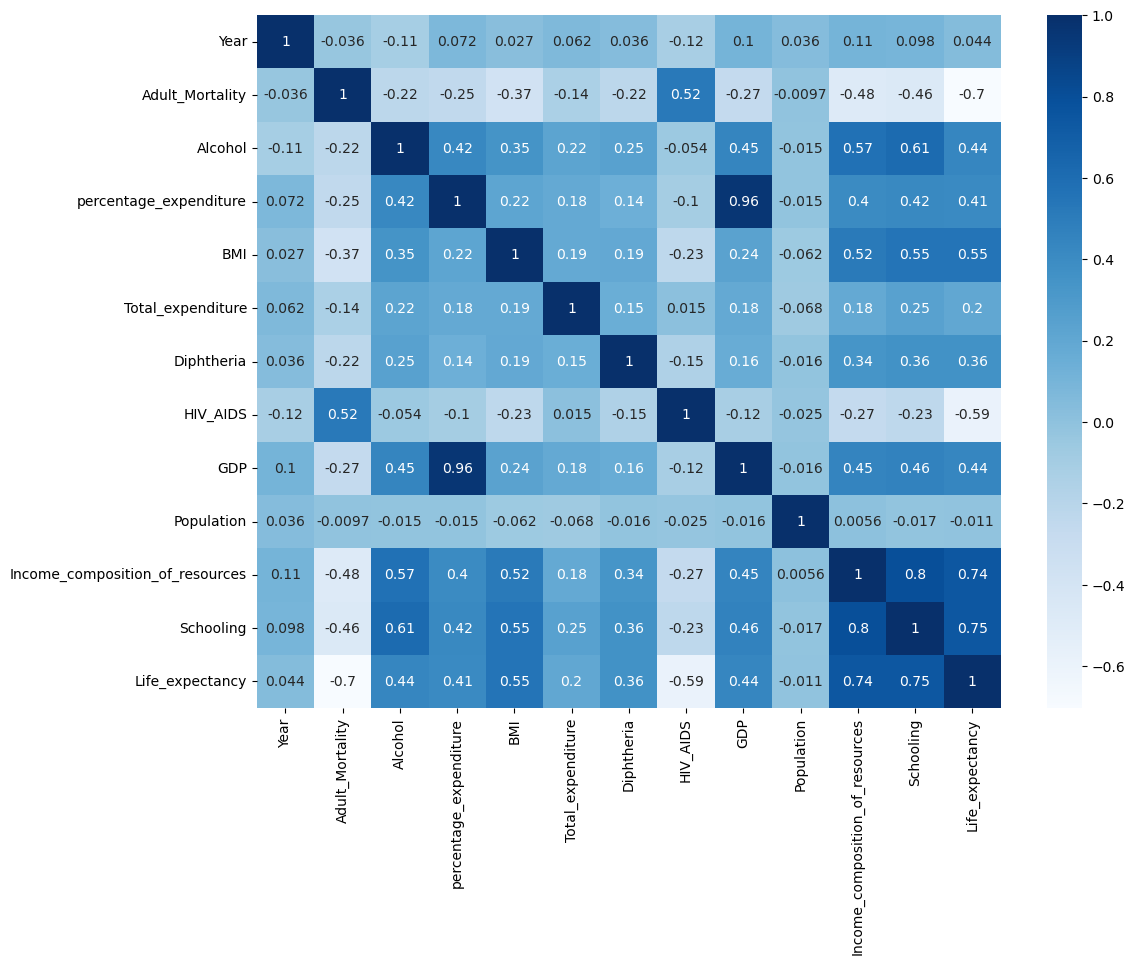

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# ignoring last column 
plt.figure(figsize=(12,9))
correlation_mat = df.corr()
# correlation
sns.heatmap(correlation_mat, annot = True,cmap = "Blues") #coding the heatmap from the correlation data martix.
plt.show()

In [6]:
X_test = pd.read_csv('LifeExpectancy_test.csv')
X_test.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,2011,Developing,275,0.01,7.097109,17.2,7.87,68,0.1,63.537231,2978599.0,0.454,9.5
1,2008,Developing,287,0.03,25.873925,15.7,8.33,64,0.1,373.361116,2729431.0,0.433,8.7
2,2011,Developing,88,5.37,437.062100,55.1,5.71,99,0.1,4437.178680,295195.0,0.738,13.3
3,2005,Developing,15,5.16,26.993121,49.9,6.12,98,0.1,279.142931,311487.0,0.685,10.8
4,2003,Developing,18,4.29,14.719289,47.9,6.27,97,0.1,189.681557,339616.0,0.674,10.7


In [7]:
from sklearn.preprocessing import StandardScaler
train = df.copy() #set the training data
normalizer = StandardScaler() #define a name for StandardScaler()func.
X_train = train.iloc[:,:-1]
Y_train = train.iloc[:,-1].to_frame()
normalizer = StandardScaler()
X_train.iloc[:, 2:] = normalizer.fit_transform(X_train.iloc[:, 2:])
X_test.iloc[:, 2:] = normalizer.transform(X_test.iloc[:, 2:])

X_train.head(10)

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,2011,Developing,-0.596230,-0.746122,0.058789,1.260316,0.455246,-0.172026,-0.304462,0.244064,-0.140504,0.668903,0.361049
1,2014,Developing,-0.111399,0.462190,0.033498,-0.333480,-0.836894,0.686328,-0.304462,0.011425,0.961461,0.553909,0.505181
2,2013,Developed,-0.801666,1.812804,-0.350645,0.887085,2.186713,0.495582,-0.304462,-0.437269,-0.073327,1.375298,1.261876
3,2014,Developed,-0.251096,-1.135578,-0.399597,1.053526,-0.212360,0.447896,-0.304462,-0.482448,-0.185208,0.882465,0.901545
4,2002,Developing,0.217300,0.342358,-0.385264,-1.856665,-1.017793,0.543269,-0.198197,-0.458771,-0.107964,0.115834,-0.251513
5,2001,Developing,2.164841,0.704352,-0.199586,-1.720486,0.967795,-0.648889,3.928452,-0.260105,0.562585,-0.037492,0.288983
6,2012,Developed,-0.883841,0.776751,-0.211759,1.482236,1.674165,0.686328,-0.304462,-0.300742,-0.212478,1.013887,0.685346
7,2014,Developing,-0.826319,0.884101,-0.344263,1.381363,-1.986898,0.304837,-0.304462,-0.438125,0.393939,1.512196,1.333942
8,2006,Developing,1.334876,0.579526,-0.357308,-1.165684,-2.094577,0.686328,0.775905,-0.454955,-0.218120,-1.269576,-1.044241
9,2003,Developed,-1.179670,1.680488,-0.355918,0.947609,0.170975,0.447896,-0.304462,-0.437200,-0.160758,0.789374,1.297909


### One-Hot Encoding

In [9]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse = False)


ohe = enc.fit_transform(X_train[['Year']])
year1 = pd.DataFrame(ohe, columns = enc.categories_[0]).drop([2000],axis=1)
ohe2 = enc.transform(X_test[['Year']])
year2 = pd.DataFrame(ohe2, columns = enc.categories_[0]).drop([2000],axis=1)


ohe3 = enc.fit_transform(X_train[['Status']])
status1 = pd.DataFrame(ohe3, columns = enc.categories_[0]).drop(['Developing'],axis = 1)
ohe4 = enc.transform(X_test[['Status']])
status2 = pd.DataFrame(ohe4, columns = enc.categories_[0]).drop(['Developing'],axis = 1)

X_train_encoded = X_train.drop(['Status','Year'],axis=1)
X_train_encoded = pd.concat([X_train_encoded,year1,status1],axis = 1)
X_test_encoded = X_test.drop(['Status','Year'],axis=1)
X_test_encoded = pd.concat([X_test_encoded,year2,status2],axis = 1)


print(X_train_encoded.shape)
print(X_test_encoded.shape)

(1154, 27)
(495, 27)


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
### Bulding and fitting the Multiple Linear Regression model###
regressor = LinearRegression()
regressor.fit(X_train_encoded, Y_train)
Y_train_pred = regressor.predict(X_train_encoded)

In [12]:
### Evaluate the Linear Regression model by computing MSE on the training set###
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train_pred, Y_train)

12.965318722949508

In [13]:
#printing coefficients along with variables

col_names = pd.DataFrame(X_train_encoded.columns, columns = ['Features'])
reg_coeff = pd.DataFrame(np.transpose(regressor.coef_), columns = ['Coefficients'])
intercept = pd.DataFrame({"Features":'Intercept',"Coefficients":regressor.intercept_})
final_coeff = pd.concat([col_names,reg_coeff], axis = 1)
intercept.append(final_coeff,ignore_index=True)

,Features,Coefficients
0,Intercept,71.191153
1,Adult_Mortality,-2.056002
2,Alcohol,-0.490003
3,percentage_expenditure,0.552403
4,BMI,0.725747
5,Total_expenditure,0.227959
6,Diphtheria,0.456559
7,HIV_AIDS,-2.666912
8,GDP,0.231527
9,Population,-0.055062


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(X_train_encoded.values, i) for i in range(len(X_train_encoded.columns))]
vif = pd.DataFrame({"Feature":X_train_encoded.columns,"VIF":vif_values})
vif

,Feature,VIF
0,Adult_Mortality,1.781158
1,Alcohol,2.302827
2,percentage_expenditure,12.452228
3,BMI,1.540082
4,Total_expenditure,1.123841
5,Diphtheria,1.178196
6,HIV_AIDS,1.444449
7,GDP,13.324361
8,Population,1.021549
9,Income_composition_of_resources,3.206010


In [15]:
from sklearn.metrics import r2_score

In [17]:
regressor1 = LinearRegression()
regressor1.fit((X_train_encoded['Schooling']).to_frame(), Y_train)
Y_train_pred = regressor1.predict(X_train_encoded['Schooling'].to_frame())
r2_score(Y_train,Y_train_pred)

0.5575121346397232

In [18]:
regressor1 = LinearRegression()
regressor1.fit((X_train_encoded[['Schooling','Adult_Mortality']]), Y_train)
y_train_pred = regressor1.predict(X_train_encoded[['Schooling','Adult_Mortality']])
r2_score(Y_train,y_train_pred)

0.7223314341007621

In [19]:
regressor1 = LinearRegression()
regressor1.fit((X_train_encoded[['Schooling','Adult_Mortality','Population']]), Y_train)
y_train_pred = regressor1.predict(X_train_encoded[['Schooling','Adult_Mortality','Population']])
r2_score(Y_train,y_train_pred)

0.7223745101723086

In [20]:
n = len(X_train_encoded)
# Print Adjusted R2 score
# Print R2 score
regressor1 = LinearRegression()
regressor1.fit((X_train_encoded['Schooling']).to_frame(), Y_train)
y_train_pred = regressor1.predict(X_train_encoded['Schooling'].to_frame())
r2 = r2_score(Y_train,y_train_pred)
1 - ((1-r2)*(n-1))/(n - 1 - 1)

0.5571280305899313

In [21]:

n = len(X_train_encoded)
# Print Adjusted R2 score
regressor1 = LinearRegression()
regressor1.fit((X_train_encoded[['Schooling','Adult_Mortality']]), Y_train)
y_train_pred = regressor1.predict(X_train_encoded[['Schooling','Adult_Mortality']])
r2 = r2_score(Y_train,y_train_pred)
1 - ((1-r2)*(n-1))/(n - 2 - 1)

0.7218489517968537

In [22]:

n = len(X_train_encoded)
# Print Adjusted R2 score
regressor1 = LinearRegression()
regressor1.fit((X_train_encoded[['Schooling','Adult_Mortality','Population']]), Y_train)
y_train_pred = regressor1.predict(X_train_encoded[['Schooling','Adult_Mortality','Population']])
r2 = r2_score(Y_train,y_train_pred)
1 - ((1-r2)*(n-1))/(n - 3 - 1)

0.7216502697640624

In [23]:
def cross_val_mse(X, y, f):
    # Get num of rows 
    n = X.shape[0]
    # Create list of indexes 
    idx_l = np.arange(n)
    split_size = f
    # Split the idx_l with split_size
    splits = np.full(split_size, n // split_size, dtype=int)
    # Make the sum of splits eqaul to n 
    splits[: n % split_size] += 1
    # Define Pointer Curr 
    curr = 0
    # Define a list to store the indexes for each fold
    fold_l = [] 
    for split in splits:
      first = curr
      last = curr + split
      fold_l.append(idx_l[first:last])
      curr = last
  
    # Shuffle the data 
    seed = random.randint(0,1000)
    X = X.sample(frac=1,random_state=seed).reset_index(drop=True)
    y = y.sample(frac=1,random_state=seed).reset_index(drop=True)

    # Define the list to store the MSE
    mse_l = [] 
    # Run loop to select the validation fold 
    for fold in fold_l: 
      # Select the validation fold 
      X_val_fold = X.iloc[fold]
      y_val_fold = y.iloc[fold]
    
      # Get the training folds 
      X_train_fold = X.drop(index=fold)
      y_train_fold = y.drop(index=fold)
      
      # Run the model 
      reg = LinearRegression().fit(X_train_fold, y_train_fold)
      
      y_pred = reg.predict(X_val_fold)
      # Store mse into the mse_l 
      mse_l.append(mean_squared_error(y_val_fold,y_pred))
      
    # Get the average MSE

    return sum(mse_l)/len(mse_l)

In [24]:
cross_val_mse(X_train_encoded, Y_train, 5)

13.869768050916798

In [25]:

from itertools import combinations 

# Prepare X_train without one hot encoded variables 
X_train_without_ohe = X_train.drop(['Status','Year'], axis=1)
X_train_only_ohe = X_train[['Year', 'Status']]


def n_combinations(X, y, ohe_X, n):
  # create a dict to record scores
  rec_dict = {} 

  for i in range(2, n + 1): 
    c = combinations(list(X.columns), i)
    
    # set a high mse to compare
    min_mse_tmp = 9999999 
    # set a variable for saving the variable combinations
    min_comb_tmp = ''

    for feature_combo in c:
      combo = list(feature_combo)
      combo_with_str = [str(x) for x in combo]
      # combo_for_mse = []

      # Cross val without one hot encoded columns 
      X_subset = X_train_encoded[combo]
      # combo_for_mse.append(X_subset)
      mse = cross_val_mse(X_subset, y, 5)
      if mse <= min_mse_tmp: 
        min_mse_tmp = mse
        min_comb_tmp = ', '.join(combo_with_str)
      
      # Cross val with one hot encoded columns 
      # one hot encode the 'Year', 'Status' Column 
      ohe = enc.fit_transform(ohe_X[['Year']])
      year1 = pd.DataFrame(ohe, columns = enc.categories_[0]).drop([2000],axis=1)
      ohe2 = enc.fit_transform(ohe_X[['Status']])
      status1 = pd.DataFrame(ohe3, columns = enc.categories_[0]).drop(['Developing'],axis = 1)

      # Combine the one hot encoded 'Year' column with the X_subset 
      X_subset_with_year = pd.concat([X_subset, year1],axis = 1)
      mse = cross_val_mse(X_subset_with_year, y, 5)
      if mse <= min_mse_tmp: 
        min_mse_tmp = mse
        min_comb_tmp = ', '.join(combo_with_str) + ', Year'
      
      # Combine the one hot encoded 'status' column with the X_subset 
      X_subset_with_status = pd.concat([X_subset, status1],axis = 1)
      mse = cross_val_mse(X_subset_with_status, y, 5)
      if mse <= min_mse_tmp: 
        min_mse_tmp = mse
        min_comb_tmp = ', '.join(combo_with_str) + ', Status'

      # Combine the one hot encoded 'status', 'year' column with the X_subset 
      X_subset_with_year_status = pd.concat([X_subset, year1, status1],axis = 1)
      mse = cross_val_mse(X_subset_with_year_status, y, 5)
      if mse <= min_mse_tmp: 
        min_mse_tmp = mse
        min_comb_tmp = ', '.join(combo_with_str) + ', Year, Status'

    # Record the best case to the dictionary(rec_dict)
    rec_dict[min_comb_tmp] = min_mse_tmp


  return rec_dict 

mse_scores = n_combinations(X_train_without_ohe, Y_train, X_train_only_ohe, 11)
mse_scores

KeyboardInterrupt: 

In [ ]:
# Print the best features and the corresponding mse
comb_with_lowest = min(mse_scores, key=mse_scores.get)
print(comb_with_lowest)
print(mse_scores[comb_with_lowest]) 

In [ ]:

X_train_encoded_fnl = X_train_encoded.drop(['Total_expenditure','GDP','Population','Developed'],axis=1)
regressor_fnl = LinearRegression()
regressor_fnl.fit(X_train_encoded_fnl, Y_train)
X_test_encoded_fnl = X_test_encoded.drop(['Total_expenditure','GDP','Population','Developed'],axis=1)

In [ ]:
# Output your prediction on test set as y_pred.
y_pred = pd.DataFrame(regressor_fnl.predict(X_test_encoded_fnl),columns=['Predicted_Life_Expectancies'])
y_pred.head()